In [50]:
!pip install matplotlib

In [51]:
!pip install seaborn

In [52]:
!pip install scikit-learn

In [53]:
!pip install xgboost

In [54]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [55]:
red_url = 'https://raw.githubusercontent.com/Coragon42/singlestore_wine/main/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/Coragon42/singlestore_wine/main/winequality-white.csv'
red_data = pd.read_csv(red_url, sep=';', header=0)
white_data = pd.read_csv(white_url, sep=';', header=0)
red_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
white_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [57]:
# combine red and white wine datasets, manually encoding a new binary color feature
red_data['color'] = 1;
white_data['color'] = 0;
wine_data = pd.concat([red_data, white_data], ignore_index = True, copy = False)
print(wine_data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [58]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [59]:
# nice dataset with no missing values and all numerical data (less preprocessing needed)
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'color'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

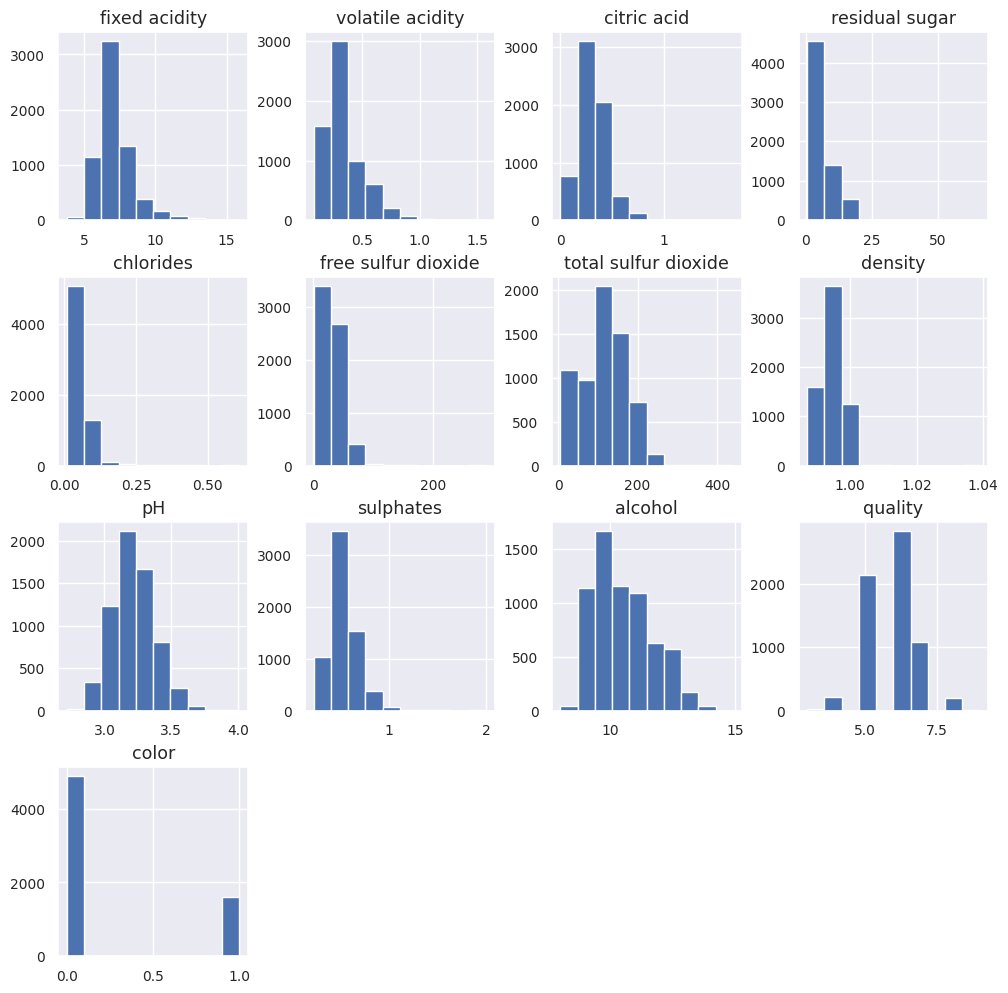

In [60]:
wine_data.hist(xlabelsize=10,ylabelsize=10,figsize=(12,12))

<Axes: >

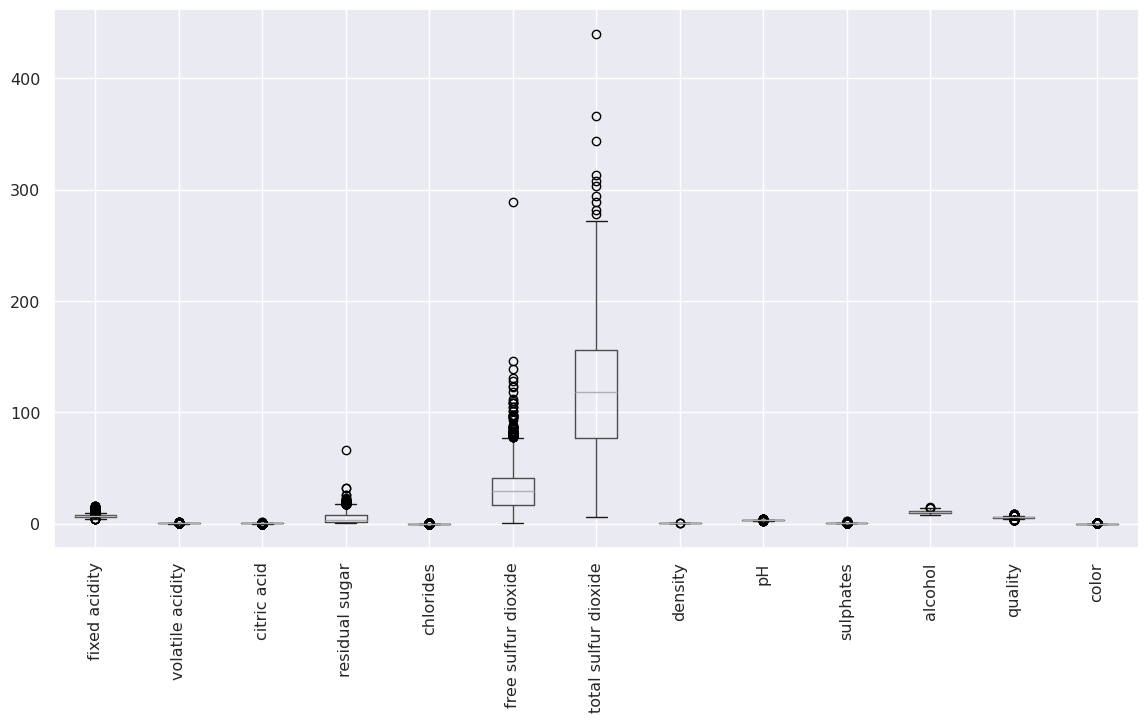

In [61]:
wine_data.boxplot(figsize=(14,7),rot=90)

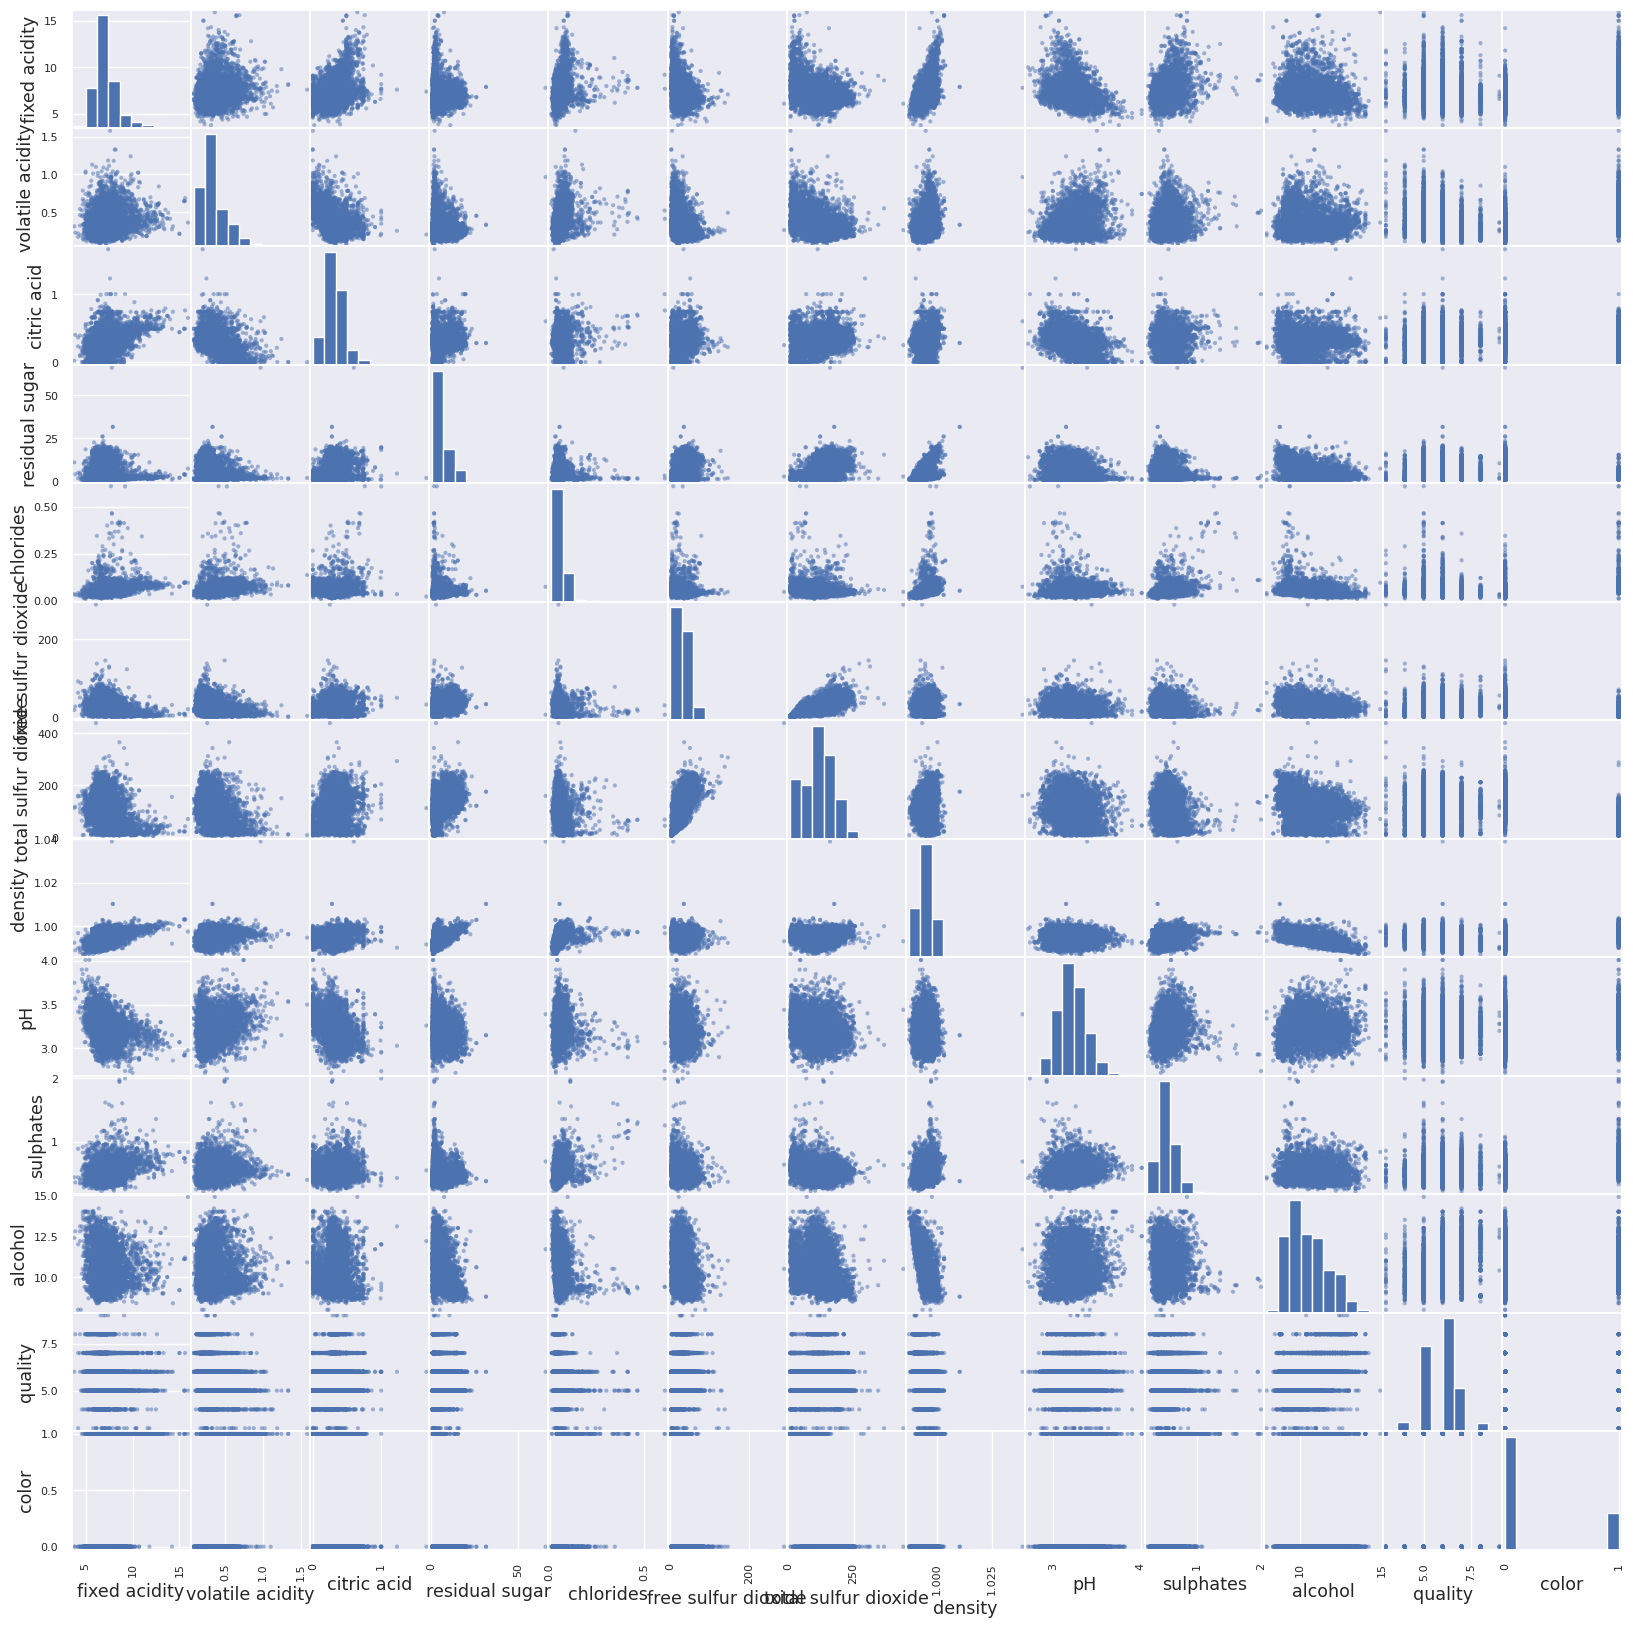

In [62]:
scatter_matrix(wine_data, figsize=[20, 20])
plt.show()

In [63]:
# Quality ratings are only from 3 to 9. 
# Let's group them into 3 classes: <5, 5-6, and 7+.
for i in np.arange(wine_data.quality.size):
    if wine_data.at[i,'quality'] > 6:
        wine_data.at[i,'quality'] = 2
    elif wine_data.at[i,'quality'] > 4:
        wine_data.at[i,'quality'] = 1
    else:
        wine_data.at[i,'quality'] = 0
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,1.158689,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.457456,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,2.000000,1.000000


In [65]:
def percent_outliers(col):
    q1 = col.describe()[4]
    q3 = col.describe()[6]
    margin = 1.5*(q3-q1)
    upper = q3 + margin
    lower = q1 - margin
    count = 0
    for val in col:
        if val < lower or val > upper:
            count += 1
    return count / col.size

# some classifiers are sensitive to outliers, but we also want to preserve most original data
def cap_outliers(col):
    q1 = col.describe()[4]
    q3 = col.describe()[6]
    margin = 1.5*(q3-q1)
    upper = q3 + margin
    lower = q1 - margin
    col.mask(col>upper,upper,inplace=True)
    col.mask(col<lower,lower,inplace=True)
    
for col in wine_data.columns:
    if col == 'quality' or col == 'color':
        continue
    percent = percent_outliers(wine_data[col])
    print(col + ': ' + str(percent))
    if (percent < 0.05):
        print(' ^capped')
        cap_outliers(wine_data[col])

fixed acidity: 0.05494843774049561
volatile acidity: 0.05802678159150377
citric acid: 0.0783438510081576
residual sugar: 0.01816222872094813
 ^capped
chlorides: 0.044020317069416656
 ^capped
free sulfur dioxide: 0.009542865938125289
 ^capped
total sulfur dioxide: 0.0015391719255040787
 ^capped
density: 0.00046175157765122367
 ^capped
pH: 0.011235955056179775
 ^capped
sulphates: 0.029398183777127905
 ^capped
alcohol: 0.00046175157765122367
 ^capped


In [69]:
q_data = wine_data.quality
wine_data.drop('quality',axis=1,inplace=True)
wine_train,wine_temp,q_train,q_temp = train_test_split(wine_data,q_data,random_state=0,test_size=0.2)
wine_dev,wine_test,q_dev,q_test = train_test_split(wine_temp,q_temp,random_state=0,test_size=0.5)
# train-dev-test split, 80-10-10%
# training data is for fitting, dev set is for model selection/parameter tuning/preventing overfitting, test set is for testing performance

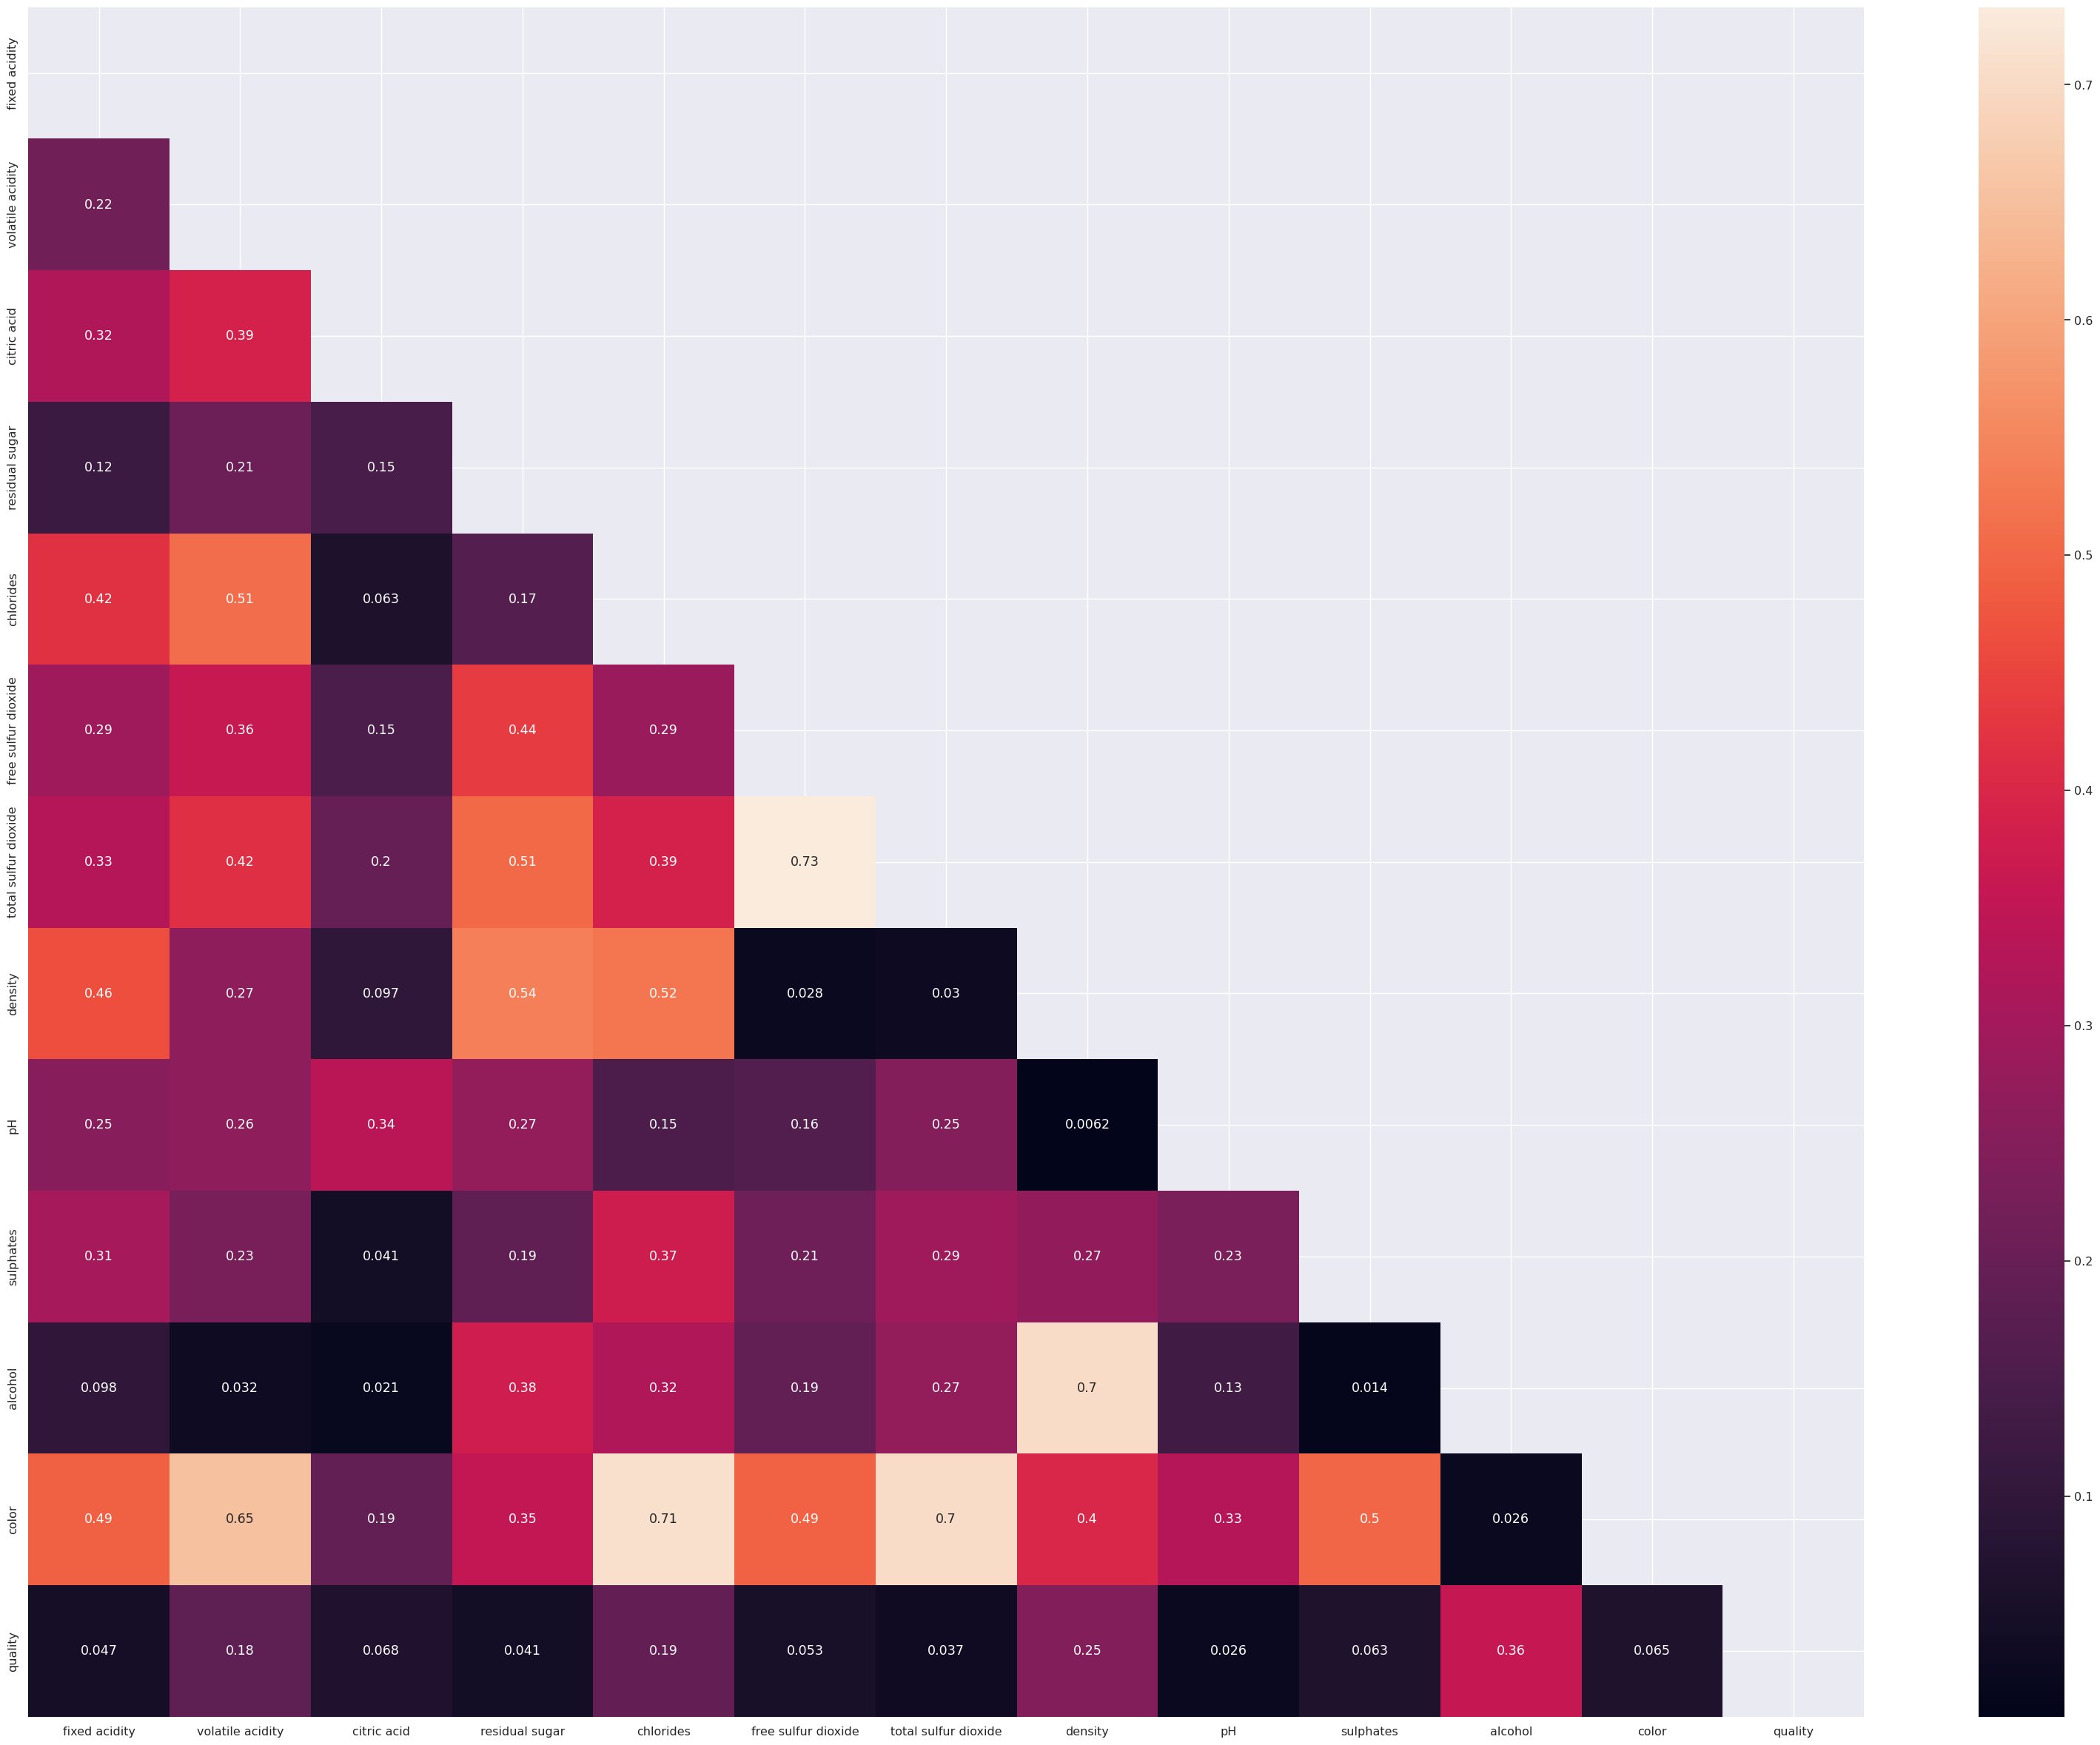

In [70]:
corr_mat = abs(pd.concat([wine_train,q_train],axis=1).corr())
fig,ax = plt.subplots(figsize=(40,30))
sns.set(font_scale=1.05)
sns.heatmap(corr_mat,annot=True,mask=np.triu(corr_mat))
plt.show()

In [130]:
# manually tuned hyperparameters (use RandomSearchCV/GridSearchCV if you have time)
xgb_model = XGBClassifier(n_estimators=3000,learning_rate=0.01,max_depth=9,min_child_weight=1,alpha=0.1,gamma=0.01,subsample=0.6,colsample_bytree=0.6,n_jobs=-1)
xgb_model.fit(wine_train,q_train,verbose=False)
print(f'accuracy of xgb_model = {accuracy_score(q_dev,xgb_model.predict(wine_dev))}')
print(f'mean cross_val_score of xgb_model = {cross_val_score(xgb_model,wine_train,q_train,n_jobs=-1).mean()}')

accuracy of xgb_model = 0.8584615384615385
mean cross_val_score of xgb_model = 0.8443329384763455


In [75]:
rforest = RandomForestClassifier(n_estimators=200,n_jobs=-1,random_state=0)
rforest.fit(wine_train,q_train)
print(f'accuracy of rforest = {accuracy_score(q_dev,rforest.predict(wine_dev))}')

accuracy of rforest = 0.8553846153846154


In [76]:
scaler = RobustScaler(unit_variance=True)
scaler.set_output(transform='pandas')
logreg = LogisticRegression(C=0.01,n_jobs=-1)
ridge = RidgeClassifier()
knclass = KNeighborsClassifier(n_jobs=-1)
svc = SVC(gamma=1)
naive = GaussianNB()
qda = QuadraticDiscriminantAnalysis()
# gpc = GaussianProcessClassifier(n_jobs=-1)
mlp = MLPClassifier(max_iter=1000,early_stopping=True)
pipe_logreg = make_pipeline(scaler,logreg)
pipe_ridge = make_pipeline(scaler,ridge)
pipe_knclass = make_pipeline(scaler,knclass)
pipe_svc = make_pipeline(scaler,svc)
pipe_naive = make_pipeline(scaler,naive)
pipe_qda = make_pipeline(scaler,qda)
# pipe_gpc = make_pipeline(scaler,gpc)
pipe_mlp = make_pipeline(scaler,mlp)
print(f'accuracy of pipe_logreg = {pipe_logreg.fit(wine_train,q_train).score(wine_dev,q_dev)}')
print(f'accuracy of pipe_ridge = {pipe_ridge.fit(wine_train,q_train).score(wine_dev,q_dev)}')
print(f'accuracy of pipe_knclass = {pipe_knclass.fit(wine_train,q_train).score(wine_dev,q_dev)}')
print(f'accuracy of pipe_svc = {pipe_svc.fit(wine_train,q_train).score(wine_dev,q_dev)}')
print(f'accuracy of pipe_naive = {pipe_naive.fit(wine_train,q_train).score(wine_dev,q_dev)}')
print(f'accuracy of pipe_qda = {pipe_qda.fit(wine_train,q_train).score(wine_dev,q_dev)}')
# print(f'accuracy of pipe_gpc = {pipe_gpc.fit(wine_train,q_train).score(wine_dev,q_dev)}') # too gigantic
print(f'accuracy of pipe_mlp = {pipe_mlp.fit(wine_train,q_train).score(wine_dev,q_dev)}')

accuracy of pipe_logreg = 0.7753846153846153
accuracy of pipe_ridge = 0.7753846153846153
accuracy of pipe_knclass = 0.8215384615384616
accuracy of pipe_svc = 0.8369230769230769
accuracy of pipe_naive = 0.7323076923076923
accuracy of pipe_qda = 0.7646153846153846
accuracy of pipe_mlp = 0.7769230769230769


In [134]:
# choosing well-performing models resistant to multicollinearity (https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf)
models = [('xgb_model',xgb_model),('rforest',rforest),('pipe_ridge',pipe_ridge),('pipe_svc',pipe_svc),('pipe_mlp',pipe_mlp)] #,('pipe_gpc',pipe_gpc),('pipe_qda',pipe_qda)]
stack = StackingClassifier(estimators=models,final_estimator=RidgeClassifier(),n_jobs=-1) # default final estimator would be logistic regression, which is sensitive to multicollinearity
stack.fit(wine_train,q_train) # takes a long time
print(f'accuracy of stack on validation data = {accuracy_score(q_dev,stack.predict(wine_dev))}')

accuracy of stack on validation data = 0.8584615384615385


In [141]:
print(f'accuracy of rforest on test data = {accuracy_score(q_test,rforest.predict(wine_test))}')
print(f'accuracy of xgb_model on test data = {accuracy_score(q_test,xgb_model.predict(wine_test))}')
print(f'accuracy of stack on test data = {accuracy_score(q_test,stack.predict(wine_test))}')

accuracy of rforest on test data = 0.8353846153846154
accuracy of xgb_model on test data = 0.8369230769230769
accuracy of stack on test data = 0.8415384615384616


In [142]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.407727,0.053230,30.339541,115.671926,0.994689,3.217638,0.526667,10.491624,0.246114
std,1.296434,0.164636,0.145318,4.613702,0.021289,16.904806,56.256191,0.002942,0.157901,0.131196,1.192136,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.795000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,17.550000,0.105500,77.000000,274.500000,1.003965,3.635000,0.855000,14.000000,1.000000


In [146]:
from ipywidgets import interact, FloatSlider
fixed_acidity_widget = FloatSlider(min=3.8,max=15.9,step=0.1)
volatile_acidity_widget = FloatSlider(min=0.08,max=1.58,step=0.01)
citric_acid_widget = FloatSlider(min=0.0,max=1.66,step=0.01)
residual_sugar_widget = FloatSlider(min=0.6,max=17.6,step=0.1)
chlorides_widget = FloatSlider(min=0.009,max=0.1055,step=0.001)
free_sulfur_dioxide_widget = FloatSlider(min=1,max=77,step=1)
total_sulfur_dioxide_widget = FloatSlider(min=6,max=275,step=1)
density_widget = FloatSlider(min=0.9871,max=1.004,step=0.0001)
pH_widget = FloatSlider(min=2.8,max=3.64,step=0.01)
sulphates_widget = FloatSlider(min=0.22,max=0.86,step=0.01)
alcohol_widget = FloatSlider(min=8,max=14,step=0.1)
color_widget = FloatSlider(min=0,max=1,step=1)

input_df = pd.DataFrame(columns=wine_data.columns)

def prediction(fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color):
    input_df.loc[0] = [fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,color]
    # print(input_df)
    output = stack.predict(input_df)
    if output == 2:
        output = 'good :)'
    elif output == 1:
        output = 'ok :|'
    else:
        output = 'bad :('
    print('prediction = ' + output)

interact(prediction,fixed_acidity=fixed_acidity_widget,volatile_acidity=volatile_acidity_widget,citric_acid=citric_acid_widget,residual_sugar=residual_sugar_widget,chlorides=chlorides_widget,free_sulfur_dioxide=free_sulfur_dioxide_widget,total_sulfur_dioxide=total_sulfur_dioxide_widget,density=density_widget,pH=pH_widget,sulphates=sulphates_widget,alcohol=alcohol_widget,color=color_widget)

interactive(children=(FloatSlider(value=3.8, description='fixed_acidity', max=15.9, min=3.8), FloatSlider(valu…

<function __main__.prediction(fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, color)>

https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

https://stackoverflow.com/questions/61859341/does-including-a-scaler-in-sklearns-pipeline-scale-the-target-variable

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

https://stats.stackexchange.com/questions/73032/linear-kernel-and-non-linear-kernel-for-support-vector-machine

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74